# Stochastic Search and Travelling Salesman Problem

In [12]:
import numpy as np
import pandas as pd
from sympy import symbols, diff
import sympy as sy
from sympy.functions import *
from sympy.utilities.lambdify import lambdify
from matplotlib import cm
import matplotlib.pyplot as plt
import random


Question 1

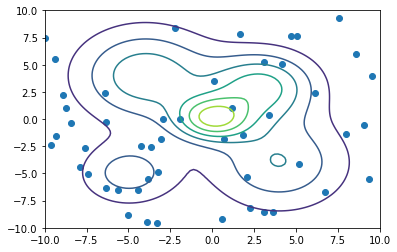

1  iteration: 


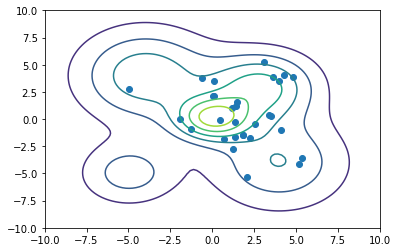

2  iteration: 


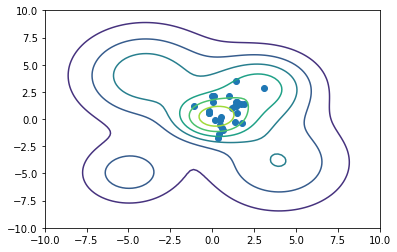

3  iteration: 


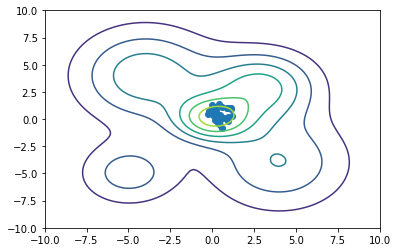

4  iteration: 


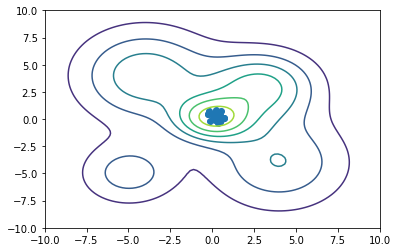

5  iteration: 


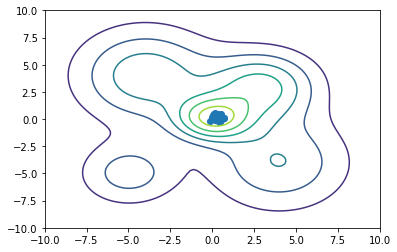

6  iteration: 


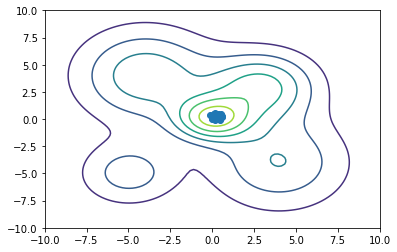

7  iteration: 


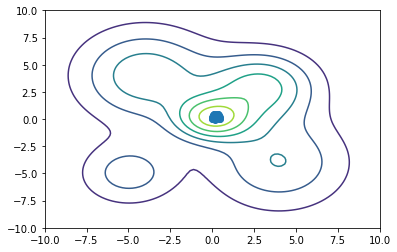

8  iteration: 


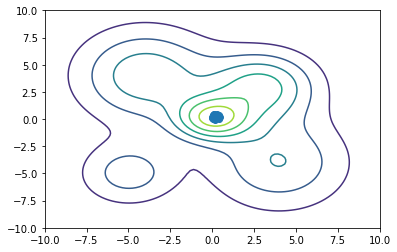

9  iteration: 


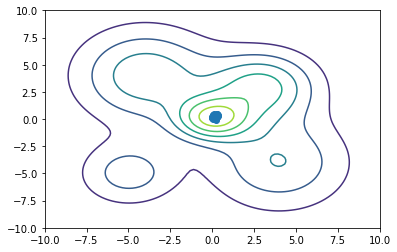

10  iteration: 


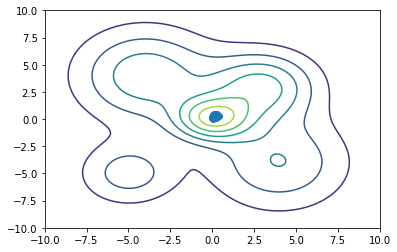

11  iteration: 


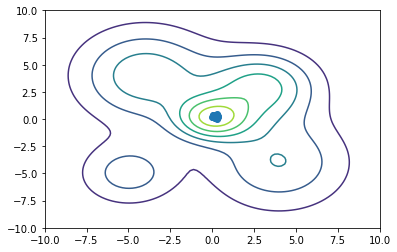

12  iteration: 


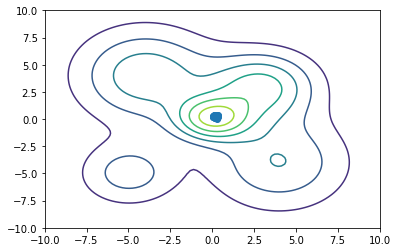

13  iteration: 


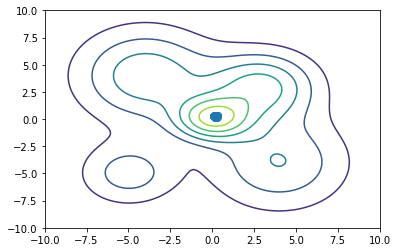

14  iteration: 


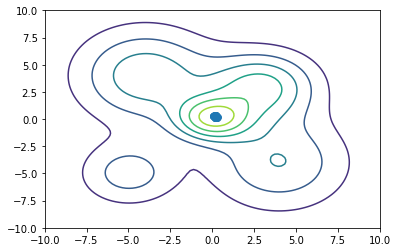

15  iteration: 


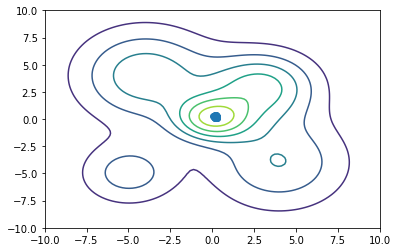

16  iteration: 


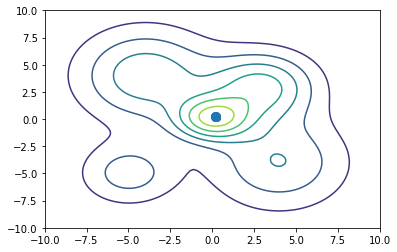

17  iteration: 


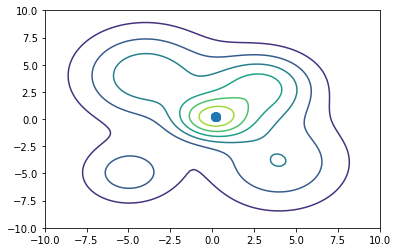

18  iteration: 


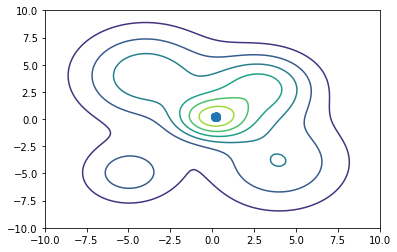

19  iteration: 


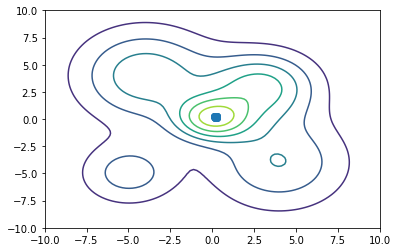

20  iteration: 


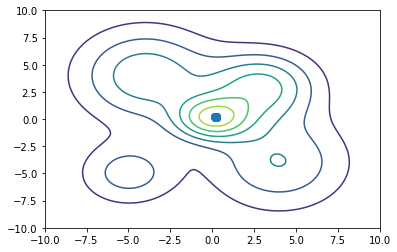

bestX ::  0.19869090173961945
bestY ::  0.18777747753353732
bestZ ::  2.7256355841551323


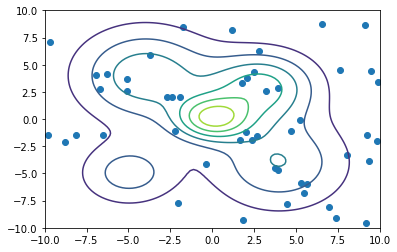

1  iteration: 


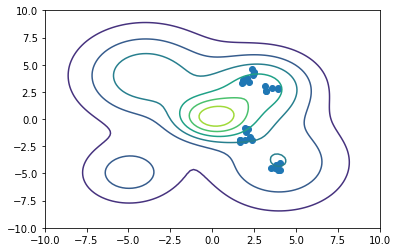

2  iteration: 


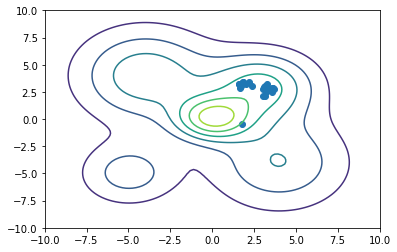

3  iteration: 


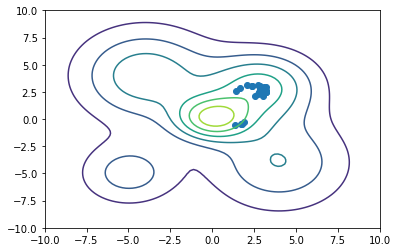

4  iteration: 


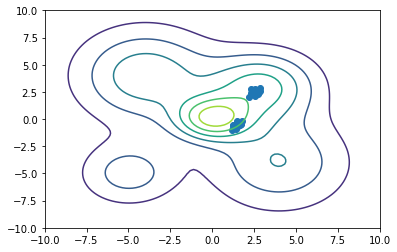

5  iteration: 


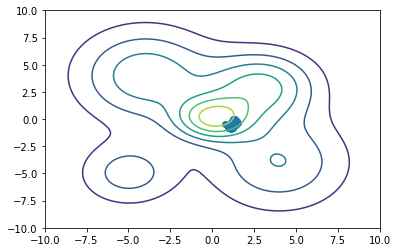

6  iteration: 


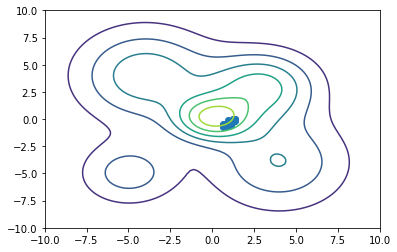

7  iteration: 


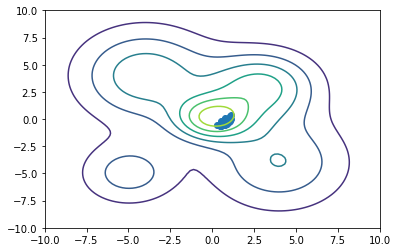

8  iteration: 


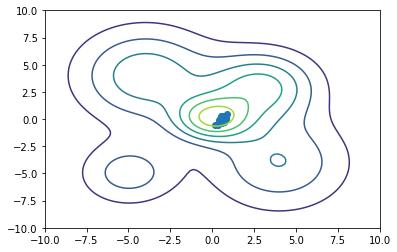

9  iteration: 


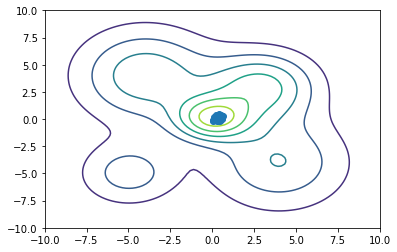

10  iteration: 


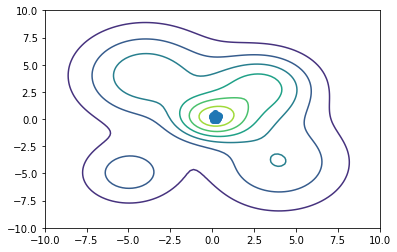

Best solution: x = 0.21971947882990167 f(x) = 0.20961029480901347


In [55]:
def f(x,y):
  z1= 1.7*exp(-(((x-3)**2)/10 + ((y-3)**2)/10) ) + exp(-(((x+5)**2)/8 + ((y+5)**2)/8) ) + 2*exp(-(((x)**2)/4 + ((y)**2)/5) ) + 1.5*exp(-(((x-4)**2)/18 + ((y+4)**2)/16) ) + 1.2*exp(-(((x+4)**2)/18 + ((y-4)**2)/16) )
  return z1

def stochasticSearch(xmin, xmax, ymin, ymax, popSize, nbhSize, maxItr):
    
    x = np.linspace(-10,10,100)
    y = np.linspace(-10,10,100)
    zz = np.zeros((100,100))

    xx, yy = np.meshgrid(x, y)
    zz = np.zeros((len(x), len(y)))
    for i in range(len(x)):
      for j in range(len(y)):
        zz[i][j] = f(x[i], y[j])

    
    alpha_x = np.random.uniform(0,1,popSize)
    x = alpha_x*xmin+(1-alpha_x)*xmax
    alpha_y = np.random.uniform(0,1,popSize)
    y = alpha_y*ymin+(1-alpha_y)*ymax
    n = int(np.floor(popSize/10))
    
    plt.contour(xx, yy, zz, cmap='viridis')
    plt.scatter(x,y);
    plt.show()
    
    for iters in range(maxItr):
        z=np.zeros(len(x))
        for i in range(len(x)):
          z[i] = f(x[i],y[i])
        z=z-z.min()
        z1=z.sum()
        p=z/z1
        ch=np.zeros(len(p))
        for i in  range(len(p)):
          ch[i]=int(np.round(popSize*p[i]))
        
        temp_x = x
        temp_y = y
        x = []
        y = []

        for i in range(len(ch)):
          x.append(temp_x[i])
          y.append(temp_y[i])
          if ch[i] > 0:
            r = nbhSize*np.random.rand(int(ch[i]))
            theta = 2*(np.pi)*np.random.rand(int(ch[i]))
            for j in range(len(r)):
                x.append(temp_x[i]+ r[j]*np.cos(theta[j]))
                y.append(temp_y[i]+ r[j]*np.sin(theta[j]))
                
        x = np.array(x)
        y = np.array(y)
        z=np.zeros(len(x))
        for i in range(len(x)):
          z[i] = f(x[i],y[i])
        idx = np.argsort(z)[::-1][:30]
        z=z[idx]
        x=x[idx]
        y=y[idx]
  
        print( iters+1," iteration: ")
        plt.contour(xx, yy, zz,cmap='viridis')
        plt.scatter(x,y);
        plt.show()
        
    index = z.argmax()
    bestX = x[index]
    bestY = y[index]
    maxF =  z[index]
    return bestX, bestY, maxF
  
x,y,z = stochasticSearch(-10, 10, -10, 10, 50, 2, 20)
print("bestX :: ",x)
print("bestY :: ",y)
print("bestZ :: ",z)

Xmin = -10
Xmax = 10
Ymin = -10
Ymax = 10
popSize = 50
nbhSize = 0.5
maxItr = 10
bestX, bestF, history = stochasticSearch(Xmin, Xmax,Ymin,Ymax, popSize, nbhSize, maxItr)
print("Best solution: x =", bestX, "f(x) =", bestF)
        
    

Question 2

In [14]:
dist = np.loadtxt("att48_d.txt")
print(dist)

[[   0. 4727. 1205. ... 1542. 2379. 3744.]
 [4727.    0. 3588. ... 5461. 4390. 2088.]
 [1205. 3588.    0. ... 2023. 1867. 2560.]
 ...
 [1542. 5461. 2023. ...    0. 1644. 3928.]
 [2379. 4390. 1867. ... 1644.    0. 2532.]
 [3744. 2088. 2560. ... 3928. 2532.    0.]]


In [15]:
def get_dist(dist_mat,seq):

  # this will return the distance covered by the salesman if the given seq is followed
  d = 0
  n = len(seq)
  for idx in range(n-1):
    d += dist_mat[seq[idx]][seq[idx+1]]   # or it can be mat[j][i] because its a symmetric matrix
  

  return d+dist_mat[seq[n-1]][0]   # from last city to first city distance is added in the end
    


In [9]:
def get_children(seq,dist):

  fitness_dist = (dist/np.sum(dist))
  max_val = np.max(dist)
  fitness_dist = (max_val-dist)/np.sum(max_val-dist)
  num_child = np.round(m*(fitness_dist))
  #print(num_child)
  children = []
  for i in range(len(num_child)):

    while(num_child[i]>0):
      rand_i = np.random.randint(1,seq.shape[0]-1)
      rand_j = np.random.randint(1,seq.shape[0]-1)
      while(rand_j==rand_i):
        rand_j = np.random.randint(1,seq.shape[0]-1)
      num_child[i]-=1
      temp = seq.copy().T[i]
      temp[rand_i],temp[rand_j] = temp[rand_j],temp[rand_i]
      # print("parent",seq.T[i])
      # print("child",temp)
      children.append(temp.T)

  children = np.array(children).T

  return children


In [16]:
def plot_path(city_loc,seq):

  for i in range(len(seq)-1):

    x_src = city_loc[seq[i]][0]
    y_src = city_loc[seq[i]][1]
    x_dest = city_loc[seq[i+1]][0]
    y_dest = city_loc[seq[i+1]][1]

    plt.scatter(x_src,y_src,color="red")
    plt.scatter(x_dest,y_dest,color="red")
    plt.plot([x_src,x_dest],[y_src,y_dest],color="black")
  
  plt.plot([city_loc[seq[len(seq)-1]][0],city_loc[seq[0]][0]],[city_loc[seq[len(seq)-1]][1],city_loc[seq[0]][1]],color="black")
  plt.show()



The Path trajectory during start


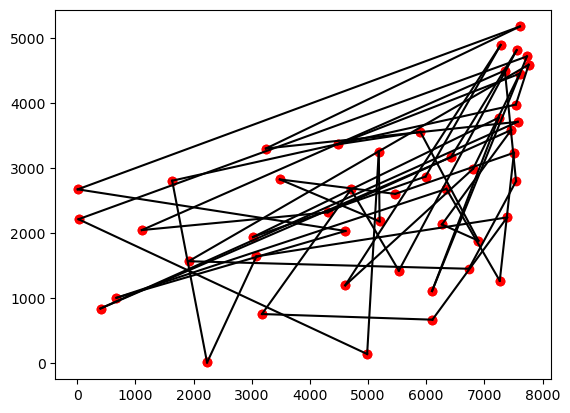

Plotting and displaying the distance travelled for very 50th iteration


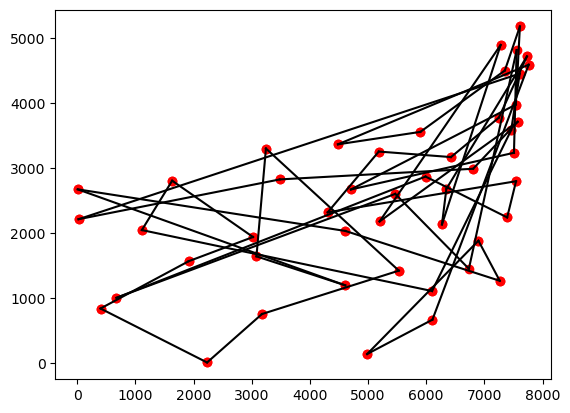

117173.0


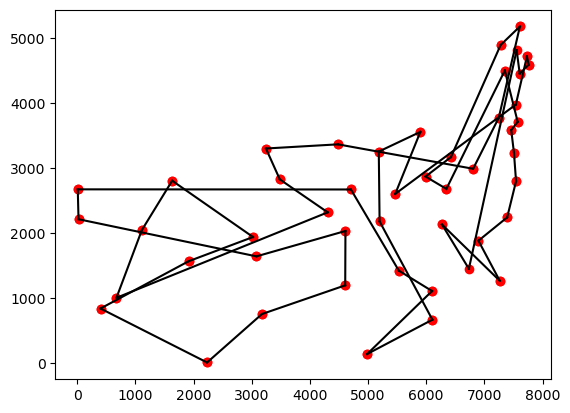

61437.0


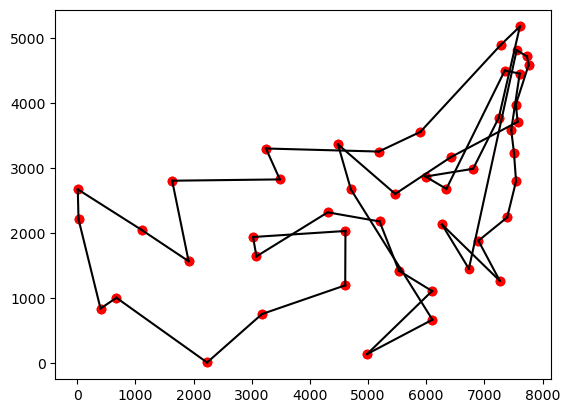

50120.0


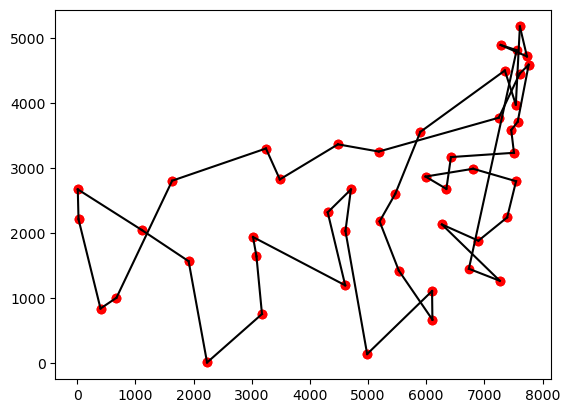

45858.0


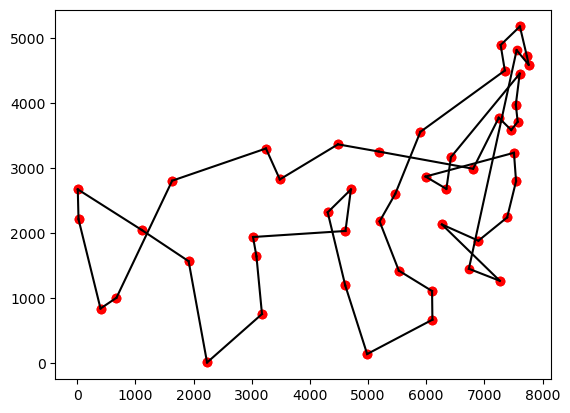

43387.0


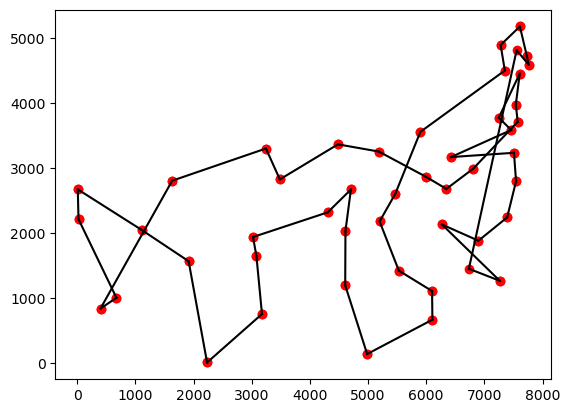

41989.0


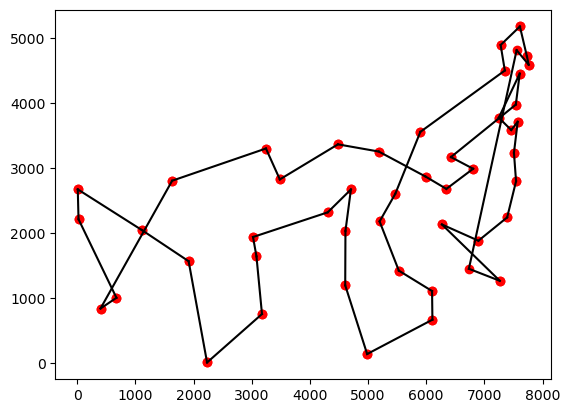

40914.0


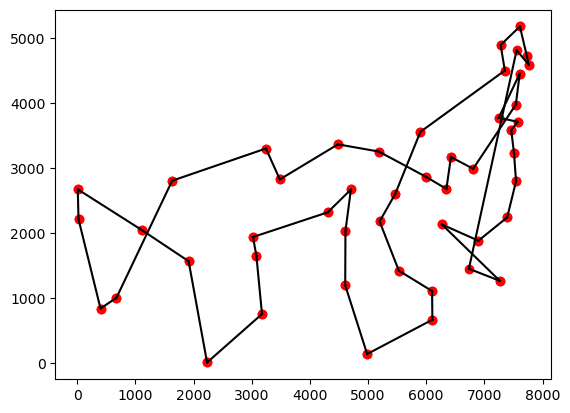

40401.0


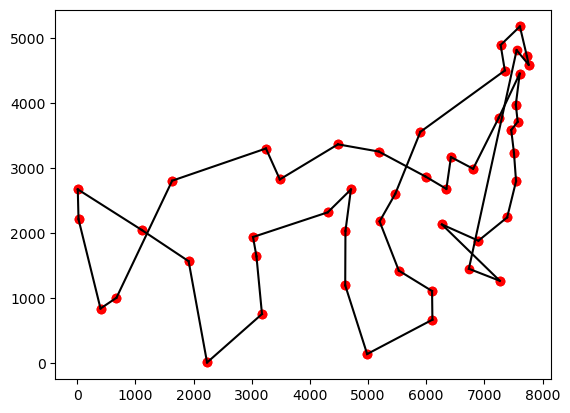

40007.0


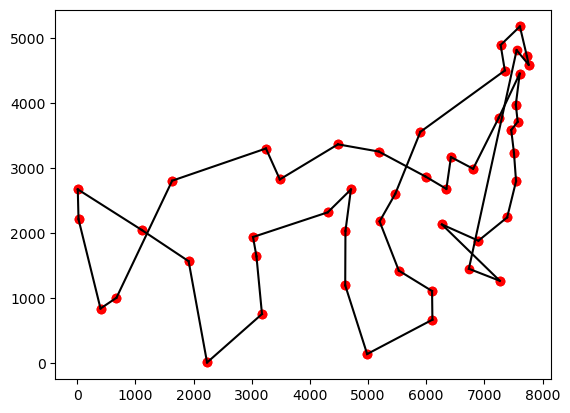

40007.0


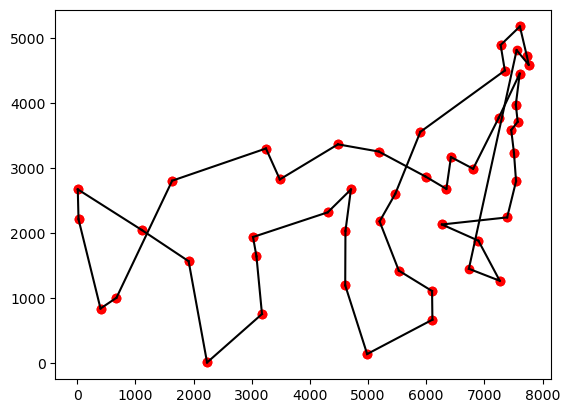

39922.0


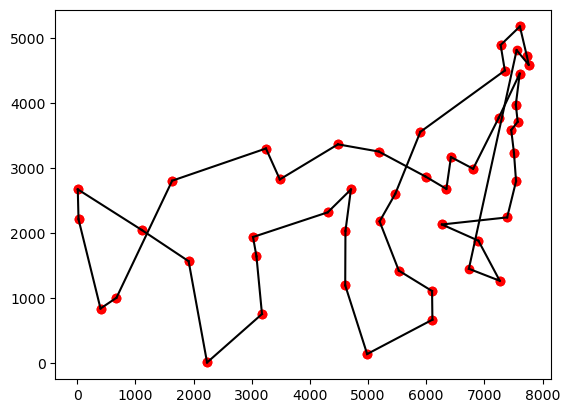

39922.0


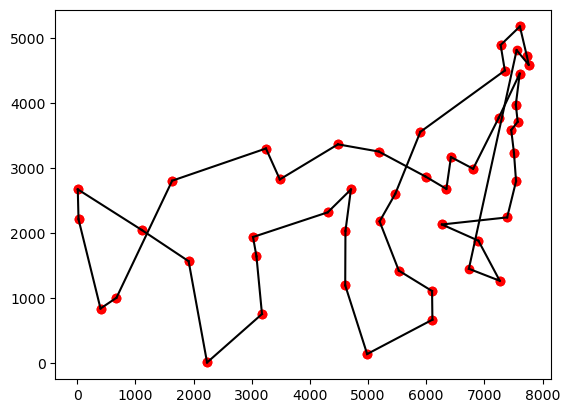

39922.0


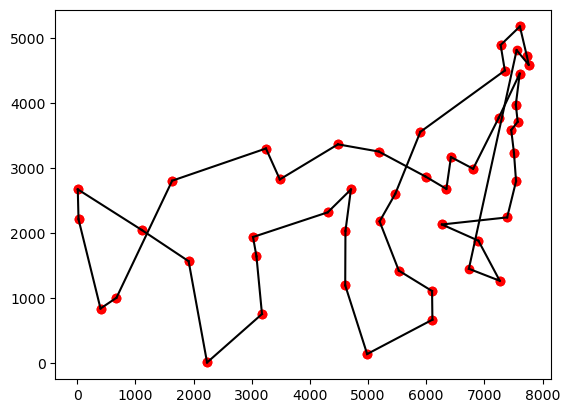

39922.0


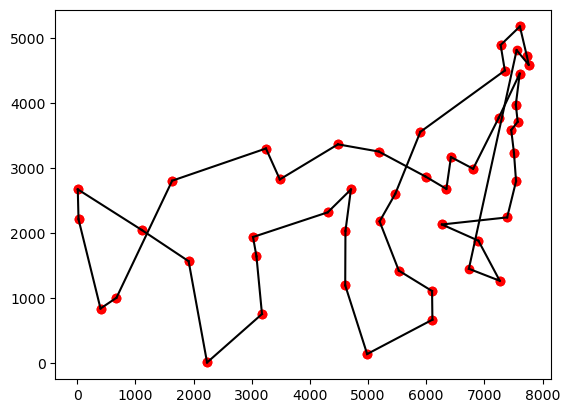

39922.0


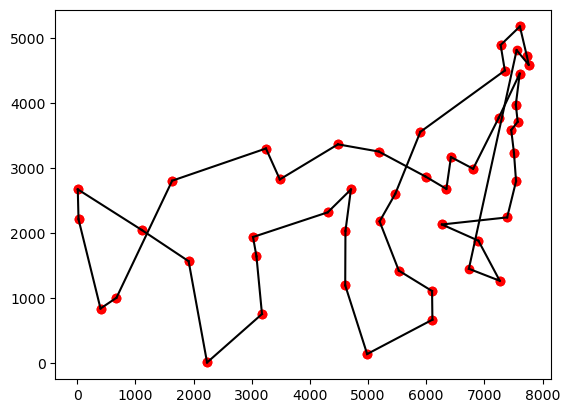

39922.0


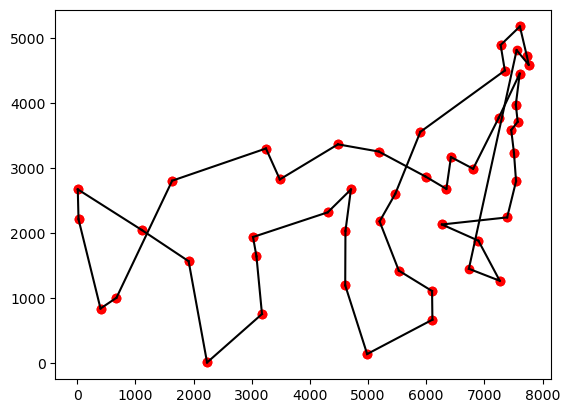

39922.0


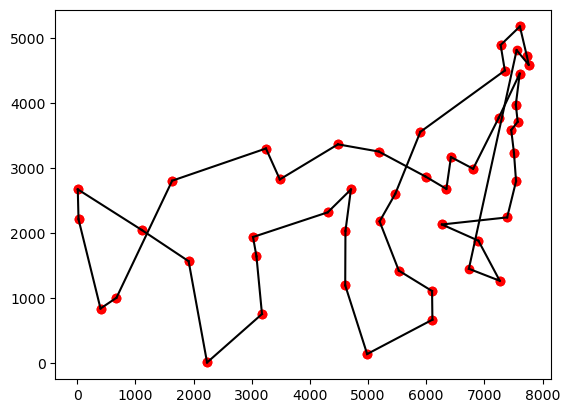

39922.0


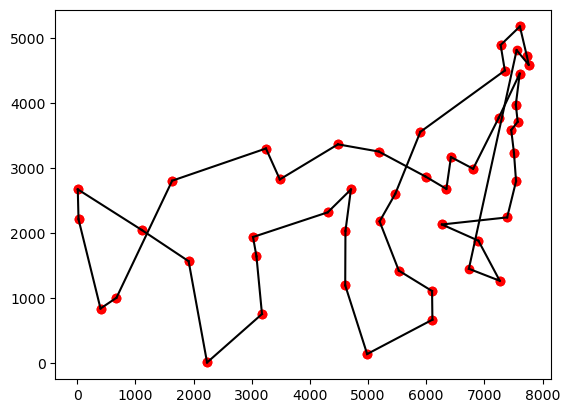

39922.0


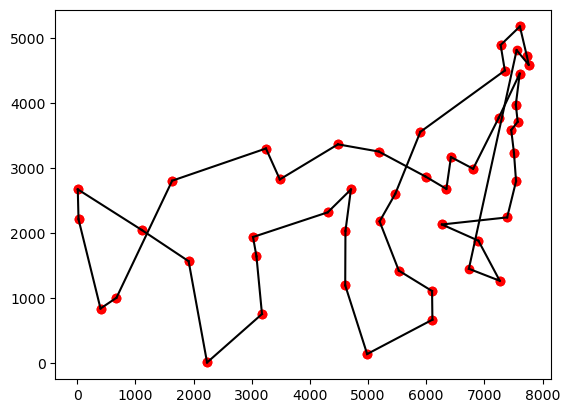

39922.0
The Path Trajectory at the end


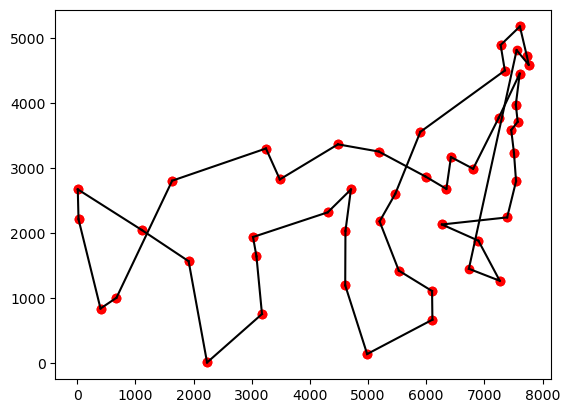

39922.0


In [17]:
dist_mat = np.loadtxt("att48_d.txt")    # each column represents the city and each row in that col is the distance of that city from other city
city_loc = np.loadtxt("att48_xy.txt")  # each row gives me the coordinates of the city, this will be used for plotting
#print(city_loc.shape)

# we will generate some samples, which are nothing but some random permutation of the sequence of the city to be visited by the salesman

# create a set of sample size where each column is that random sequence, then we get distance for each, depending on the fitness we can generate its rw_children, which will be
# random shuffling of two cities

m = 1000

seq =  np.arange(0,48).reshape(-1,1)
np.random.shuffle(seq[1:])
for i in range(m-1):
  temp_seq = np.arange(0,48).reshape(-1,1)
  np.random.shuffle(temp_seq[1:])
  seq = np.append(seq,temp_seq,axis=1)

dist = get_dist(dist_mat,seq.T[0])
for i in range(1,seq.shape[1]):
  d = get_dist(dist_mat,seq.T[i])
  dist = np.append(dist,d)

# # my distance array contains the solution of the problem, now i will generate its children based on the fitness
# # here fitness will be more for values which are less, so after normalizing do p = 1-p, this will give more weight to values which are less and hence more fit

iters = 1000

print("The Path trajectory during start")
plot_path(city_loc,seq[:,0])
print("Plotting and displaying the distance travelled for very 50th iteration")
while(iters>0):
  chld = get_children(seq,dist)

  

  chld_dist  = get_dist(dist_mat,chld.T[0])

  for i in range(1,chld.shape[1]):
    c_d = get_dist(dist_mat,chld.T[i])
    chld_dist = np.append(chld_dist,c_d)

 

  all_seq = np.concatenate((seq,chld),axis=1)
  all_dist = np.concatenate((dist,chld_dist))

  sorted_dist = np.sort(all_dist)

  sorted_idx = np.argsort(all_dist)

  sorted_seq = all_seq[:,sorted_idx]    

   
  seq = sorted_seq[:,:m]
  dist = sorted_dist[:m]
  if (iters%50)==0:
    plot_path(city_loc,seq[:,0])
    print(sorted_dist[0])

  iters-=1

print("The Path Trajectory at the end")
plot_path(city_loc,seq[:,0])
print(dist[0])


